## Basic Auto Encoder Creation

- 오토인코더는 입력 변수로부터 데이터를 재구성하는 과정을 통해 특성을 추출하는데 활용할 수 있다.

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 

#인풋이미지는 한 인스턴스 당 28x28=784개의 feature를 가지므로 shape을 다음과 같이 정해준다.
input_img = Input(shape=(784,))

#인코더와 디코더를 각각 한 층으로 쌓아준다.
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

#최종 오토인코더 모형은 인풋부터 인코더, 디코더의 아웃풋까지 연결해준다.
autoencoder = Model(input_img, decoded)


#다음과 같이 인코더와 디코더를 분리해서 정의해놓는 것도 가능하다.
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [9]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
#MNIST dataset의 x입력값들을 28x28=784의 크기로 벡터화한다.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
#위에서 정의한 오토인코더 모형 학습
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2755 - val_loss: 0.1874
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1702 - val_loss: 0.1542
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1442 - val_loss: 0.1331
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1280 - val_loss: 0.1207
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1175 - val_loss: 0.1118
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1103 - val_loss: 0.1060
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1052 - val_loss: 0.1016
Epoch 8/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1014 - val_loss: 0.0984
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0987 - val_loss: 0.0963
Epoch

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

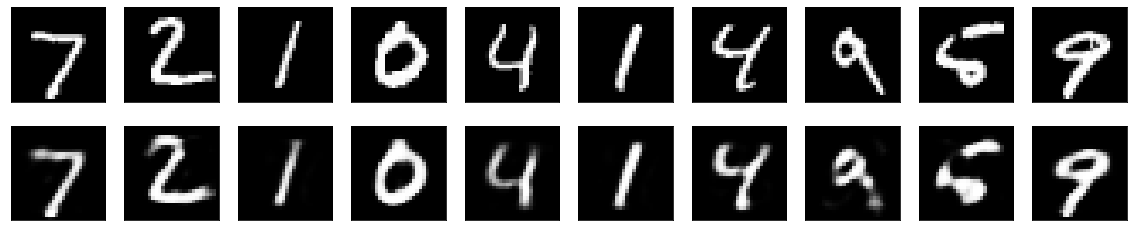

In [13]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Deep AutoEncoder

- 기본적인 구성 Basic AutoEncoder와 유사하다.
- 모델 생성 시 더 깊은 층우로 구성하며, 각 층의 활성함수를 변경하구나 dropout을 추가하는 등 모델 구조를 변경해 볼 수 있다.



In [14]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [15]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [16]:
#기본적인 오토인코더에서 인코더 및 디코더를 더 깊은 층으로 구성한다.
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [17]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2499 - val_loss: 0.1723
Epoch 2/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1554 - val_loss: 0.1408
Epoch 3/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1346 - val_loss: 0.1274
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1239 - val_loss: 0.1188
Epoch 5/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1180 - val_loss: 0.1145
Epoch 6/100
60000/60000 [==============================] - 2s 42us/step - loss: 0.1145 - val_loss: 0.1112
Epoch 7/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1111 - val_loss: 0.1080
Epoch 8/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1085 - val_loss: 0.1061
Epoch 9/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1062 - val_loss: 0.1

In [18]:
#오토인코더의 아웃풋을 변수에 저장
decoded_imgs = autoencoder.predict(x_test)

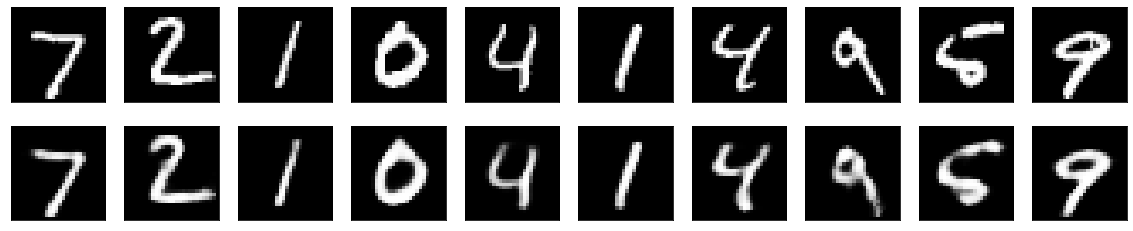

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional Auto Encoder Model based on CNN

- convolution auto encoder는 심층 오토 인코더가 MLP가 아니라 CNN으로 구성된다.
- 오토인코더 모형 생성 시 Dense 함수가 아닌 Conv2D 함수를 사용한다.
- 필터 갯수, 커널 크기, 활성 함수, optimizer를 변경하며 조절해볼 수 있다.

In [21]:
(x_train, _), (x_test, _) = mnist.load_data()

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

#컨볼루션 오토인코더에서는 인풋이 이미지 그대로 들어간다. (28x28)
#기본적인 오토인코더가 MLP 모형으로 이루어졌다면,
#컨볼루션 오토인코더는 CNN(Convolutional Neural Networks)으로 이루어졌다고 볼 수 있다.

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.5259 - val_loss: 0.3674
Epoch 2/50
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2564 - val_loss: 0.2063
Epoch 3/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1924 - val_loss: 0.1800
Epoch 4/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1726 - val_loss: 0.1646
Epoch 5/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1596 - val_loss: 0.1531
Epoch 6/50
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1503 - val_loss: 0.1457
Epoch 7/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1438 - val_loss: 0.1401
Epoch 8/50
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1388 - val_loss: 0.1358
Epoch 9/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1349 - val_loss: 0.1321
Epoch

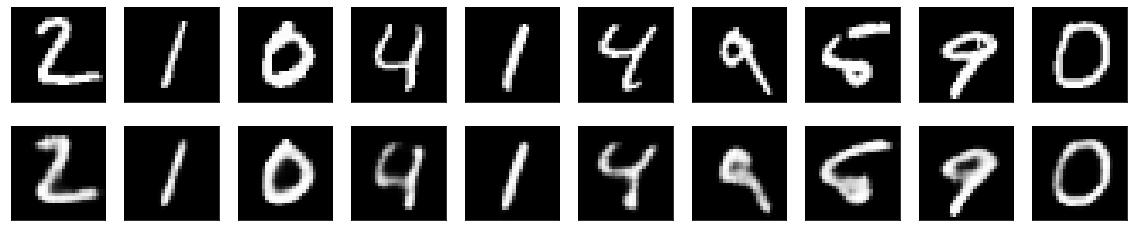

In [23]:
decoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
(x_train, _), (x_test, _) = mnist.load_data()
#컨볼루션 오토인코더를 활용하여 Denoising
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [25]:
#가우스 노이즈 데이터 생성
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

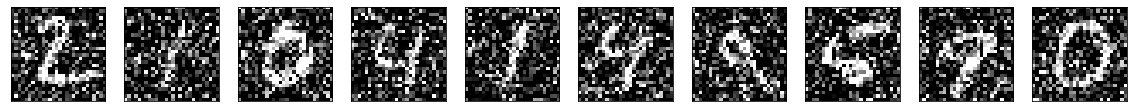

In [26]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
#컨볼루션 오토인코더를 활용
#Deep autoencoder를 활용해도 된다.(이 경우 인풋을 784로 맞춰야 한다.) 

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 160s 3ms/step - loss: 0.3770 - val_loss: 0.2043
Epoch 2/50
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1683 - val_loss: 0.1476
Epoch 3/50
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1402 - val_loss: 0.1321
Epoch 4/50
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1296 - val_loss: 0.1249
Epoch 5/50
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1244 - val_loss: 0.1208
Epoch 6/50
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1209 - val_loss: 0.1183
Epoch 7/50
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1186 - val_loss: 0.1160
Epoch 8/50
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1167 - val_loss: 0.1144
Epoch 9/50
60000/60000 [==============================] - 228s 4ms/step - loss: 0.1152 - val_loss: 0.1

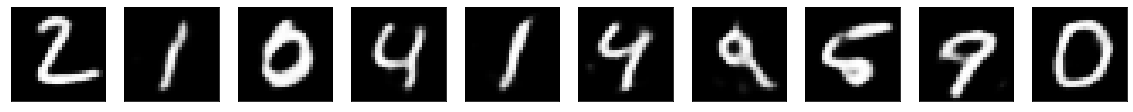

In [30]:
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()